# IBM Capstone Project
## In this project, We will find out a better disctrict to open a new theatre in Paris by:
### Using multiple datasets from different sources (i.e. Web, Geocode, CSV files, Foursquare API)
### Python Webscraping using Beautifulsoup
### Data Preprocessing
### Data Analysis

In [5]:
!pip install beautifulsoup4
!pip install lxml
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                                                    /failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - cffi -> python[version='2.7.*|3.5.*|3.6.*|3.6.12|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.9,<3.10.0a0|>=3.8,<3.9.0a0|3.6.9|3.6.9|3.6.9|>=2.7,<2.8.0a0|3.6.9|>=3.5,<3.6.0a0|3.4.*',build='1_73_pypy|4_73_pypy|3_73_pypy|2_73_pypy|0_73_pypy']
  - rsa -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']

Your python: python=3.7

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, t

ModuleNotFoundError: No module named 'folium'

In [38]:
# Get the neighborhood data using beautiful soup 
url='https://en.wikipedia.org/wiki/List_of_theatres_and_entertainment_venues_in_Paris'
result = requests.get(url)
data_html = BeautifulSoup(result.content)


In [39]:
# Now we will read the data into a Pandas Dataframe
soup = BeautifulSoup(str(data_html))
neigh = soup.find('table')
table_str = str(neigh.extract())

In [47]:
df = pd.read_html(table_str)[0]
df.head(138)

,Name,Address,Arrt,Opened,Seats,Present use,Notes
0,AccorHotels Arena,NaN,12th,1984,17000,concerts,formerly Palais omnisports de Paris-Bercy and ...
1,Aktéon,NaN,11th,1986,60,"theatre (plays), concerts",NaN
2,Alhambra,NaN,11th,2008,530,music hall,formerly Théâtre Art Déco des Cheminots
3,Artistic-Athévains,NaN,11th,1913,220,theatre (plays),"formerly Folies Artistic, Artistic Concert, Ar..."
4,Ateliers Berthier,NaN,6th,2003,500,theatre (plays),second stage of the Théâtre de l'Odéon
...,...,...,...,...,...,...,...
133,Le Trabendo,"211, avenue Jean Jaurès",19th,NaN,700,concerts,NaN
134,Le Trianon,NaN,18th,1895,1000,concerts,"formerly Trianon-Concert,Trianon-Théâtre, Théâ..."
135,Les Trois Baudets,NaN,18th,NaN,250,"concerts, chanson",NaN
136,Vingtième Théâtre,NaN,20th,NaN,245,general use,NaN


In [46]:
df.shape

(0, 3)

In [48]:
df = df[['Name', 'Arrt', 'Present use']]
df.head(138)

,Name,Arrt,Present use
0,AccorHotels Arena,12th,concerts
1,Aktéon,11th,"theatre (plays), concerts"
2,Alhambra,11th,music hall
3,Artistic-Athévains,11th,theatre (plays)
4,Ateliers Berthier,6th,theatre (plays)
...,...,...,...
133,Le Trabendo,19th,concerts
134,Le Trianon,18th,concerts
135,Les Trois Baudets,18th,"concerts, chanson"
136,Vingtième Théâtre,20th,general use


In [49]:
df.groupby('Arrt').count()['Name']

Arrt
10th     9
11th    11
12th     3
13th     4
14th     9
15th     3
16th     2
17th     3
18th    18
19th     4
1st      1
20th     6
2nd      1
3rd      1
4th      1
5th      1
6th      1
8th      2
9th      1
Name: Name, dtype: int64

In [50]:
df_paris = df
df_paris.head()

,Name,Arrt,Present use
0,AccorHotels Arena,12th,concerts
1,Aktéon,11th,"theatre (plays), concerts"
2,Alhambra,11th,music hall
3,Artistic-Athévains,11th,theatre (plays)
4,Ateliers Berthier,6th,theatre (plays)


In [73]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_abc6ab634277450c8f25879f3c70393c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='rIV7hr12VAmpMzY7lYgjgC8eYW21nsfILNtt4Dtp52WF',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_abc6ab634277450c8f25879f3c70393c.get_object(Bucket='myjupyternotebookonibmwatsonstudi-donotdelete-pr-27s2mqmeecxaue',Key='Paris Arrt Geometry.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head(20)


,Arrt,Latitude,Longitude
0,1th,48.864,2.331
1,2th,48.867,2.34
2,3th,48.864,2.362
3,4th,48.856,2.356
4,5th,48.846,2.345
5,6th,48.851,2.333
6,7th,48.857,2.32
7,8th,48.878,2.318
8,9th,48.872,2.34
9,10th,48.872,2.357


In [74]:
# merge the two tables
df = pd.merge(df, df_data_1, on='Arrt')
df.head()

,Name,Arrt,Present use,Latitude,Longitude
0,AccorHotels Arena,12th,concerts,48.841,2.388
1,Opéra Bastille,12th,opera,48.841,2.388
2,Théâtre Douze,12th,general,48.841,2.388
3,Aktéon,11th,"theatre (plays), concerts",48.858,2.38
4,Alhambra,11th,music hall,48.858,2.38


In [99]:

PU = df_paris['Present use'].unique().tolist()

In [246]:
df['Latitude']= df['Latitude']*1
df['Longitude']=df['Longitude']*1
lat_paris = df['Latitude']
lon_paris = df['Longitude']
print('The geographical coordinates of Paris are {}, {}'.format(lat_paris, lon_paris))

The geographical coordinates of Paris are 0     48.841
1     48.841
2     48.841
3     48.858
4     48.858
       ...  
73    48.841
74    48.841
75    48.846
76    48.863
77    48.863
Name: Latitude, Length: 78, dtype: float64, 0     2.388
1     2.388
2     2.388
3      2.38
4      2.38
      ...  
73      2.3
74      2.3
75    2.345
76    2.276
77    2.276
Name: Longitude, Length: 78, dtype: object


In [249]:
lat_paris = lat_paris.mean()
#lon_paris = lon_paris.mean()
print('The geographical coordinates of Paris are {}, {}'.format(lat_paris,lon_paris))

The geographical coordinates of Paris are 48.86530769230768, 0     2.388
1     2.388
2     2.388
3      2.38
4      2.38
      ...  
73      2.3
74      2.3
75    2.345
76    2.276
77    2.276
Name: Longitude, Length: 78, dtype: object


In [102]:

# This will color categorize each borough
presentuse_color = {}
for presentuse in PU:
    presentuse_color[presentuse]= '#%02X%02X%02X' % tuple(np.random.choice(range(256), size=3)) #Random color

## Use Folium to get map

In [105]:
pip install folium

     |████████████████████████████████| 94 kB 6.0 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [106]:
import folium

In [116]:
map_paris = folium.Map(location=[str(48.865),str(2.388)], zoom_start=10.5)

for lat, lng, arrt, pu in zip(df_paris['Latitude'], 
                                           df_paris['Longitude'],
                                           df_paris['Arrt'], 
                                           df_paris['Present use']):
    label_text = arrt + ' - ' + pu
    label = folium.Popup(label_text)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=presentuse_color[presentuse],
        fill_color=presentuse_color[presentuse],
        fill_opacity=0.8).add_to(map_paris) 
    
map_paris

# Next we will define foursquare Credentials

In [160]:
CLIENT_ID = 'XE50LMYN3EHYK0QQ1AUPUEO5IAN15PHB3SR0ZRZFU11I52B0' # your Foursquare ID
CLIENT_SECRET = 'XWZMXWRGWW2RL2IKE2NEFEKQP4B24O30XNB4WXUYIG4I33RP' # your Foursquare Secret
VERSION = 20200514 # Foursquare API version

print('Credentials Stored')

Credentials Stored


In [175]:
df_paris.loc[0, 'Name']

'AccorHotels Arena'

# Now, let's get the top 100 venues that are in Paris within a radius of 500 meters.
## First, let's create the GET request URL

In [176]:
paris_latitude = df_paris.loc[0, 'Latitude'] # latitude value
paris_longitude = df_paris.loc[0, 'Longitude'] # longitude value

paris_name = df_paris.loc[0, 'Name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(paris_name, 
                                                               paris_latitude, 
                                                               paris_longitude))

Latitude and longitude values of AccorHotels Arena are 48.841, 2.388.


In [177]:
# type your answer here
radius = 500 # define radius
LIMIT = 100 # limit of number of venues returned by Foursquare API
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    paris_latitude, 
    paris_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=XE50LMYN3EHYK0QQ1AUPUEO5IAN15PHB3SR0ZRZFU11I52B0&client_secret=XWZMXWRGWW2RL2IKE2NEFEKQP4B24O30XNB4WXUYIG4I33RP&v=20200514&ll=48.841,2.388&radius=500&limit=100'

In [178]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ffca08509586a1e9c2b119f'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Paris',
  'headerFullLocation': 'Paris',
  'headerLocationGranularity': 'city',
  'totalResults': 44,
  'suggestedBounds': {'ne': {'lat': 48.8455000045, 'lng': 2.394824578754403},
   'sw': {'lat': 48.8364999955, 'lng': 2.381175421245597}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4babcddaf964a520f9ca3ae3',
       'name': 'Les Jardins de Mandchourie',
       'location': {'address': '34 allée Vivaldi',
        'lat': 48.84165404125834,
        'lng': 2.3904457262875813,
        'labeledLatLngs': [{'label': 'display',
          'lat': 48.84165404125834,
          'ln

In [179]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [180]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Les Jardins de Mandchourie,Chinese Restaurant,48.841654,2.390446
1,Jardin de Reuilly – Paul Pernin,Garden,48.842314,2.387614
2,Les Caves de Reuilly,Wine Bar,48.839208,2.390714
3,Le Janissaire,Turkish Restaurant,48.841433,2.391444
4,Leroy Merlin,Furniture / Home Store,48.842710,2.385468


In [182]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

44 venues were returned by Foursquare.


In [183]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [185]:
print(df_paris.shape)
df_paris.head()

(78, 5)


,Name,Arrt,Present use,Latitude,Longitude
0,AccorHotels Arena,12th,concerts,48.841,2.388
1,Opéra Bastille,12th,opera,48.841,2.388
2,Théâtre Douze,12th,general,48.841,2.388
3,Aktéon,11th,"theatre (plays), concerts",48.858,2.38
4,Alhambra,11th,music hall,48.858,2.38


In [187]:
df_paris.head(78)

,Name,Arrt,Present use,Latitude,Longitude
0,AccorHotels Arena,12th,concerts,48.841,2.388
1,Opéra Bastille,12th,opera,48.841,2.388
2,Théâtre Douze,12th,general,48.841,2.388
3,Aktéon,11th,"theatre (plays), concerts",48.858,2.38
4,Alhambra,11th,music hall,48.858,2.38
...,...,...,...,...,...
73,Théâtre Silvia-Monfort,15th,"theatre (plays), general",48.841,2.3
74,Théo Théâtre,15th,theatre (plays),48.841,2.3
75,Théâtre de la Huchette,5th,theatre (plays),48.846,2.345
76,Théâtre le Ranelagh,16th,general,48.863,2.276


## Lets check how many venues per district

In [189]:
df_paris.groupby('Arrt').count()

,Name,Present use,Latitude,Longitude
Arrt,,,,
10th,9,9,9,9
11th,11,11,11,11
12th,3,3,3,3
13th,4,4,4,4
14th,9,9,9,9
15th,3,3,3,3
16th,2,2,2,2
17th,3,3,3,3
18th,18,18,18,18


In [191]:
print("The Categories are", df_paris['Present use'].unique())

The Categories are ['concerts' 'opera' 'general' 'theatre (plays), concerts' 'music hall'
 'theatre (plays)' 'indoor circus' 'theatre (plays), dance'
 'one-man shows' 'Asian theatre' 'cabaret, concerts' 'night club on boat'
 'cabaret' 'theatre (plays), musicals' 'comedy' 'chanson'
 'concerts, chanson' 'music, dance and drama' 'general use'
 'theatre (plays), general' 'dance, theatre (plays)']


In [223]:
"theatre (plays)" in df_paris['Present use'].unique()

True

In [198]:
# one hot encoding
to_onehot = pd.get_dummies(df_paris[['Present use']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_onehot['Arrt'] = df_paris['Arrt'] 

# move neighborhood column to the first column
fixed_columns = [to_onehot.columns[-1]] + list(to_onehot.columns[:-1])
to_onehot = to_onehot[fixed_columns]

print(to_onehot.shape)
to_onehot.head(78)

(78, 22)


,Arrt,Asian theatre,cabaret,"cabaret, concerts",chanson,comedy,concerts,"concerts, chanson","dance, theatre (plays)",general,...,music hall,"music, dance and drama",night club on boat,one-man shows,opera,theatre (plays),"theatre (plays), concerts","theatre (plays), dance","theatre (plays), general","theatre (plays), musicals"
0,12th,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12th,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,12th,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,11th,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,11th,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,15th,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
74,15th,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
75,5th,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
76,16th,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [199]:
to_grouped = to_onehot.groupby(["Arrt"]).mean().reset_index()

print(to_grouped.shape)
to_grouped.head()

(16, 22)


,Arrt,Asian theatre,cabaret,"cabaret, concerts",chanson,comedy,concerts,"concerts, chanson","dance, theatre (plays)",general,...,music hall,"music, dance and drama",night club on boat,one-man shows,opera,theatre (plays),"theatre (plays), concerts","theatre (plays), dance","theatre (plays), general","theatre (plays), musicals"
0,10th,0.000000,0.0,0.000000,0.0,0.0,0.111111,0.0,0.0,0.111111,...,0.000000,0.0,0.00,0.111111,0.000000,0.555556,0.000000,0.000000,0.0,0.111111
1,11th,0.090909,0.0,0.090909,0.0,0.0,0.181818,0.0,0.0,0.090909,...,0.090909,0.0,0.00,0.090909,0.000000,0.090909,0.090909,0.090909,0.0,0.000000
2,12th,0.000000,0.0,0.000000,0.0,0.0,0.333333,0.0,0.0,0.333333,...,0.000000,0.0,0.00,0.000000,0.333333,0.000000,0.000000,0.000000,0.0,0.000000
3,13th,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.25,0.000000,0.000000,0.500000,0.000000,0.250000,0.0,0.000000
4,14th,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.111111,...,0.111111,0.0,0.00,0.000000,0.000000,0.777778,0.000000,0.000000,0.0,0.000000


In [224]:
ita = to_grouped[["Arrt","theatre (plays)"]]
ita.head() #.head() shows the first five rows only

,Arrt,theatre (plays)
0,10th,0.555556
1,11th,0.090909
2,12th,0.000000
3,13th,0.500000
4,14th,0.777778


# Now we will cluster the districts
## We will use k-means clustering. But first we will find the best K using the Elbow Point method.

In [225]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=15, random_state=8)
X = ita.drop(['Arrt'], axis=1)

In [227]:
kmeans.fit(X)
kmeans.labels_[0:10]

array([0, 1, 1, 0, 2, 0, 1, 0, 1, 0], dtype=int32)

In [228]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X)
    return km.inertia_

In [230]:
scores = [get_inertia(x) for x in range(2, 16)]

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  app.launch_new_instance()
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  app.launch_new_instance()
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  app.launch_new_instance()
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  app.launch_new_instance()
/opt/conda/envs/Python-3.7-main/lib/pyth

Text(0, 0.5, 'Error')

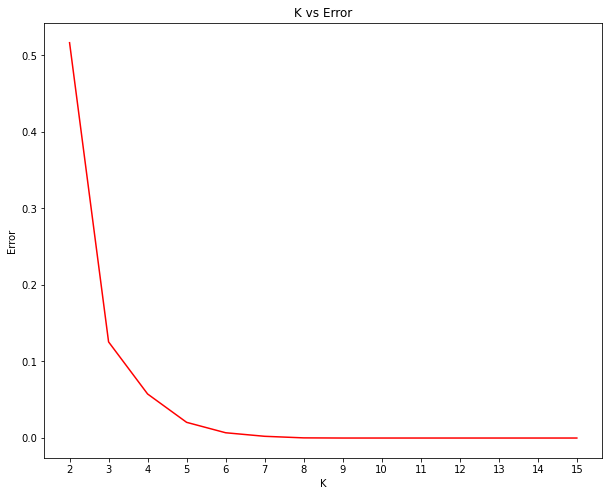

In [232]:
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 16), y=scores, color='r')
plt.title("K vs Error")
plt.xticks(range(2, 16))
plt.xlabel("K")
plt.ylabel("Error")

## Analysis of Cluster

In [219]:
# import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests
import json
from bs4 import BeautifulSoup
import matplotlib.cm as cm
import matplotlib.colors as colors

%matplotlib inline
print('Packages installed  :)')

Packages installed  :)


In [236]:
to_merged = ita.copy()

# add clustering labels
to_merged["Cluster Labels"] = kmeans.labels_

In [239]:
to_merged.head()

,Arrt,theatre (plays),Cluster Labels,Name,Present use,Latitude,Longitude
0,10th,0.555556,0,Théâtre des Bouffes du Nord,theatre (plays),48.872,2.357
0,10th,0.555556,0,La Java,concerts,48.872,2.357
0,10th,0.555556,0,Laurette Théâtre,general,48.872,2.357
0,10th,0.555556,0,Le Splendid,theatre (plays),48.872,2.357
0,10th,0.555556,0,Théâtre Antoine-Simone Berriau,theatre (plays),48.872,2.357


In [241]:
# sort the results by Cluster Labels
print(to_merged.shape)
to_merged.sort_values(["Cluster Labels"], inplace=True)
to_merged

(78, 7)


,Arrt,theatre (plays),Cluster Labels,Name,Present use,Latitude,Longitude
0,10th,0.555556,0,Théâtre des Bouffes du Nord,theatre (plays),48.872,2.357
3,13th,0.500000,0,Théâtre 13,theatre (plays),48.832,2.356
3,13th,0.500000,0,Théâtre du Lierre,"theatre (plays), dance",48.832,2.356
5,15th,0.333333,0,Palais des Sports,general,48.841,2.3
5,15th,0.333333,0,Théâtre Silvia-Monfort,"theatre (plays), general",48.841,2.3
...,...,...,...,...,...,...,...
4,14th,0.777778,2,Théâtre le Guichet Montparnasse,theatre (plays),48.833,2.327
4,14th,0.777778,2,Théâtre Montparnasse,theatre (plays),48.833,2.327
4,14th,0.777778,2,Théâtre Rive Gauche,theatre (plays),48.833,2.327
4,14th,0.777778,2,La Comédie Italienne,theatre (plays),48.833,2.327


In [243]:
to_merged['Present use'].value_counts()['theatre (plays)']

26

We see that there are a total of 26 locations with played theatres in Paris
We will create a new dataframe with the Arrt and played theatres

In [260]:
# create map
map_clusters = folium.Map(location=[str(48.841), str(2.388)], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(to_merged['Latitude'], to_merged['Longitude'], to_merged['Name'], to_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
    


       
map_clusters